In [35]:
from feat import Detector # py-feat
import imageio.v2 as imageio # to create video from frames
import io

In [36]:
detector = Detector(face_model='retinaface', 
                    landmark_model='mobilenet', 
                    au_model='xgb', 
                    emotion_model='resmasknet', 
                    facepose_model='img2pose-c', # constrained version of img2pose, for frontal face
                    identity_model='facenet', 
                    device='cuda', 
                    n_jobs=1, 
                    verbose=False,
                    )

In [37]:

video_path = "F:\\RAVDESS\\Actor_11\\01-01-07-01-02-01-11.mp4"
print(video_path)
output_filename = f'F:\\tracked_overlay\\{video_path[-24:-4]}_tracked_no_original_image.mp4'
print(output_filename)

F:\RAVDESS\Actor_11\01-01-07-01-02-01-11.mp4
F:\tracked_overlay\01-01-07-01-02-01-11_tracked_no_original_image.mp4


In [38]:

print("running py-feat detector")
# run detector
video_prediction = detector.detect_video(video_path, 
                                         skip_frames=None, 
                                         output_size=720, 
                                         batch_size=1, 
                                         num_workers=0, 
                                         pin_memory=False, 
                                         face_detection_threshold=0.5, 
                                         face_identity_threshold=0.8
                                         )


running py-feat detector


100%|██████████| 104/104 [01:00<00:00,  1.71it/s]


generating overlay for each frame


d:\playground\feat-git\lib\site-packages\feat\data.py:1744: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(5 * num_subplots, 7))


generating video
Video saved as F:\tracked_overlay\01-01-07-01-02-01-11_tracked_no_original_image.mp4


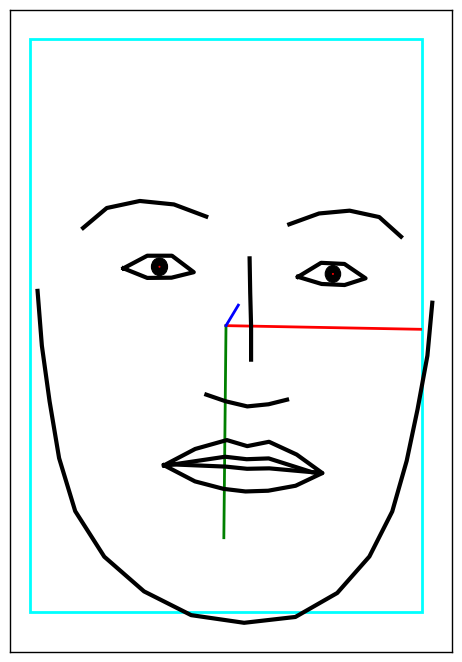

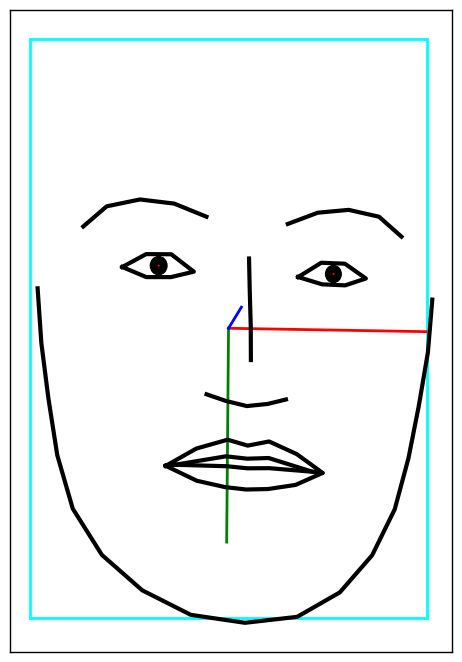

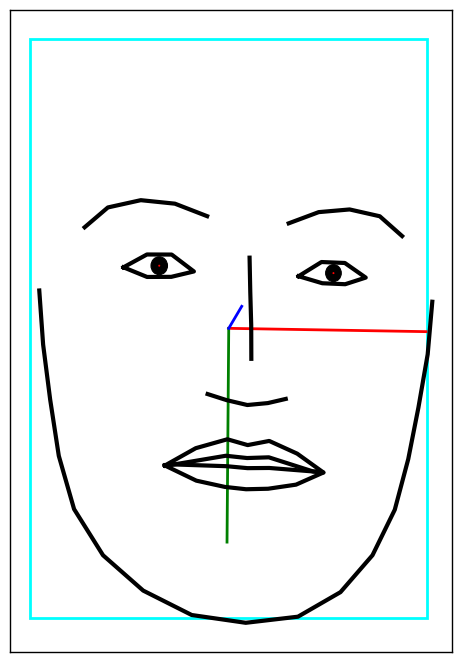

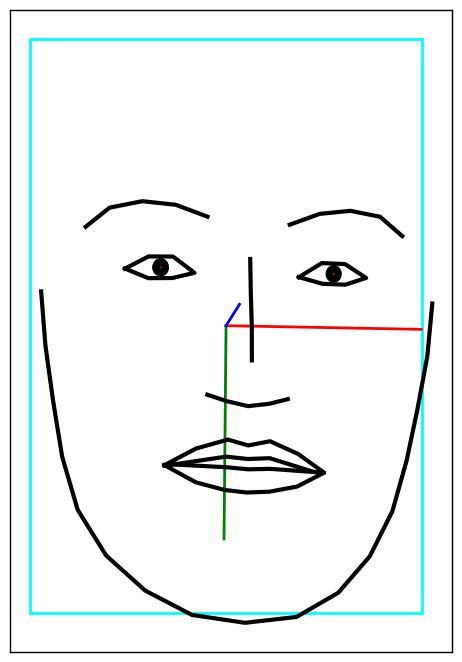

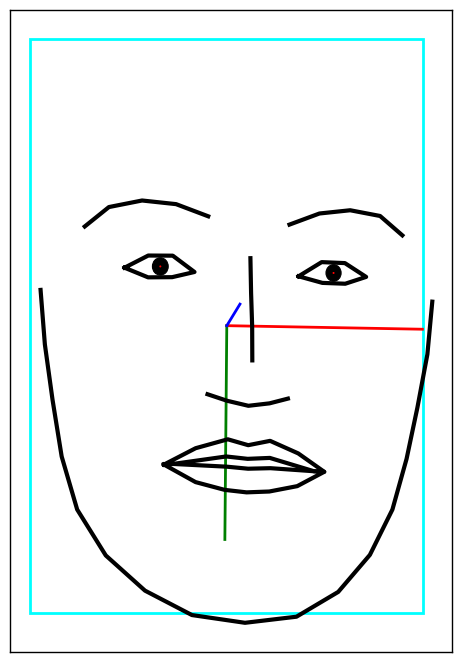

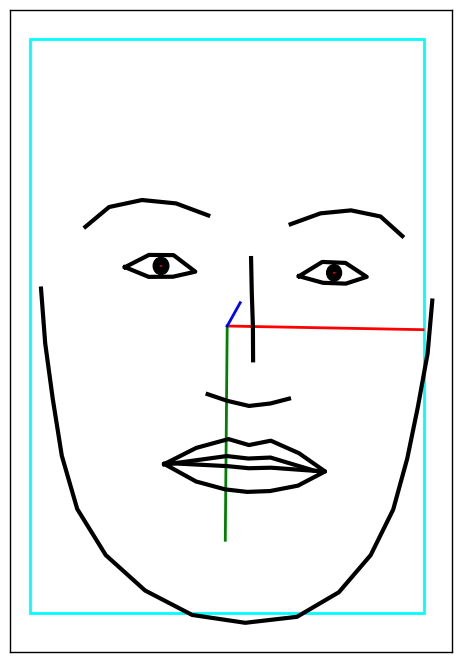

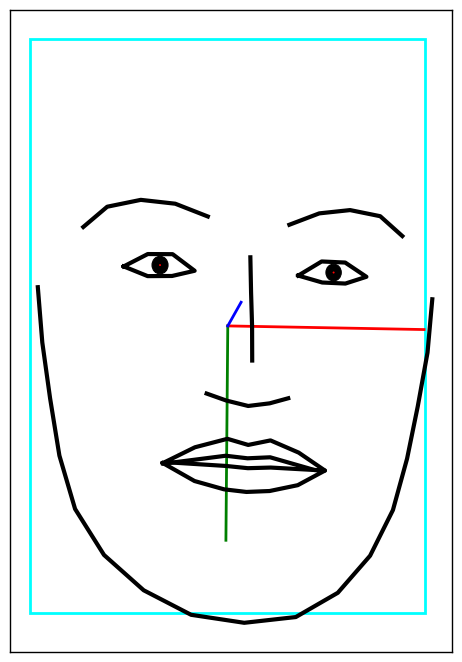

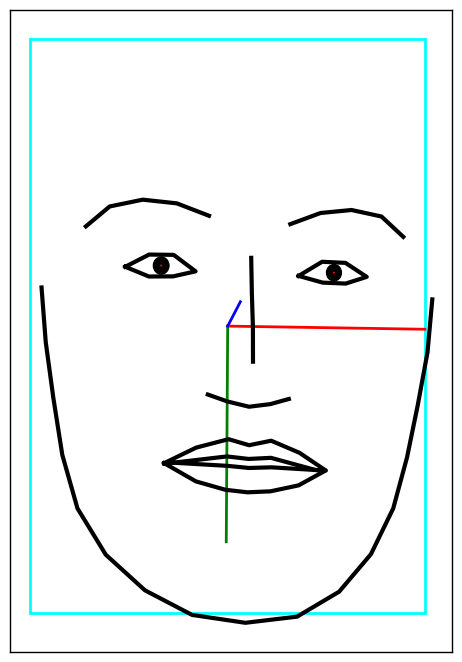

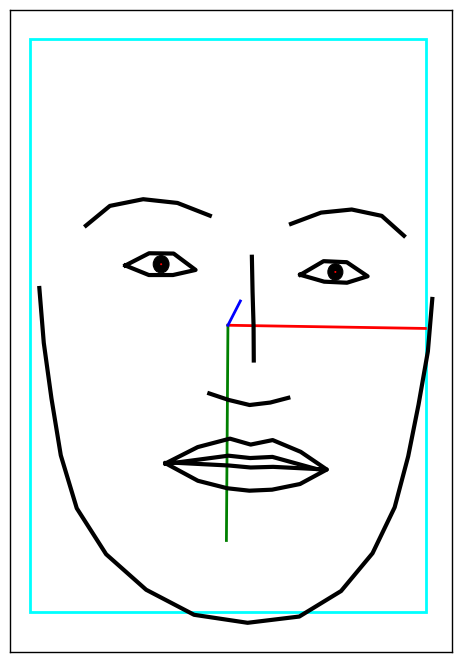

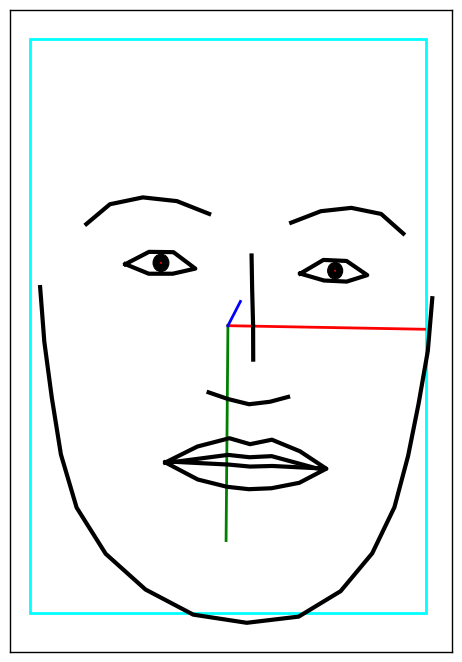

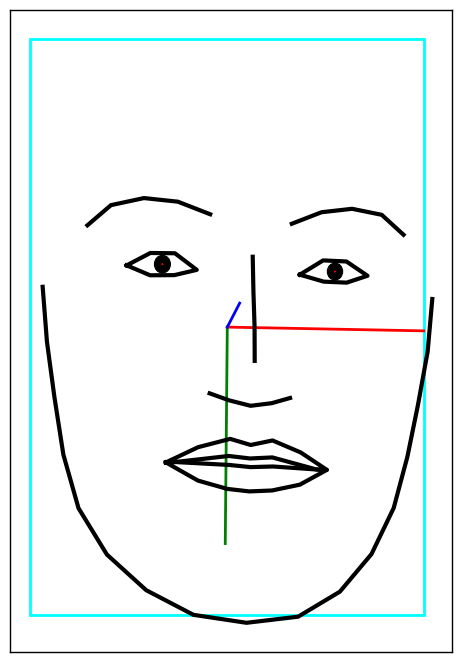

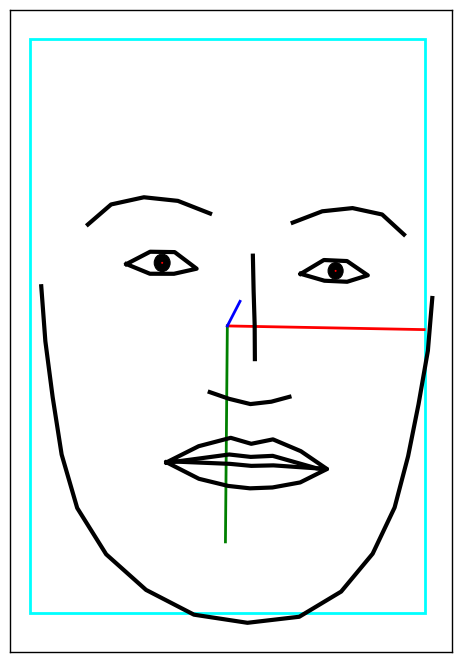

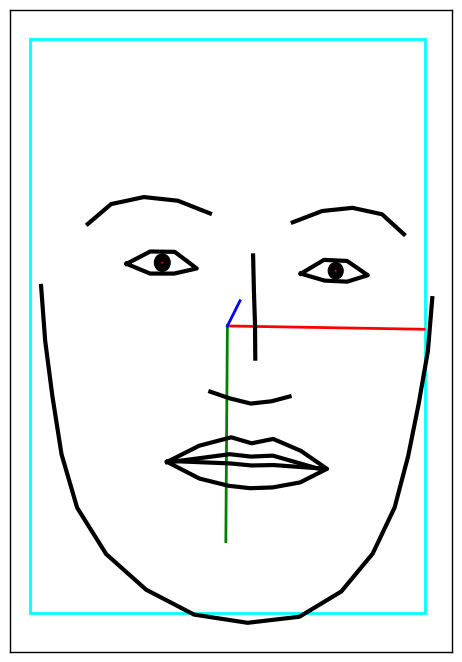

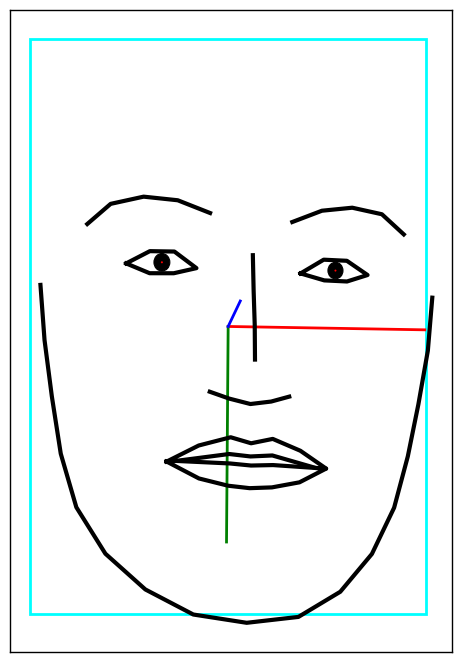

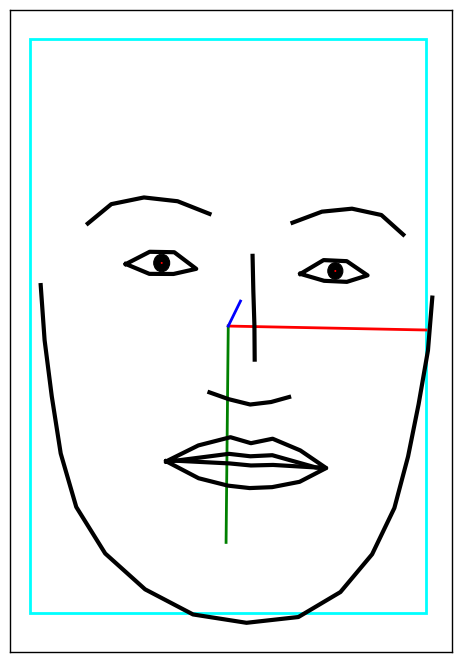

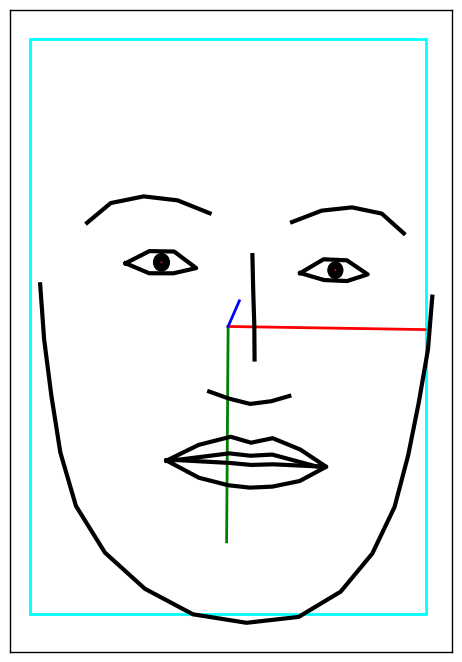

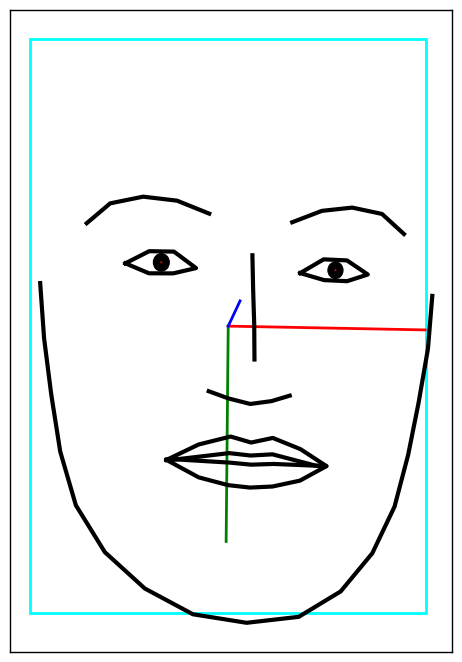

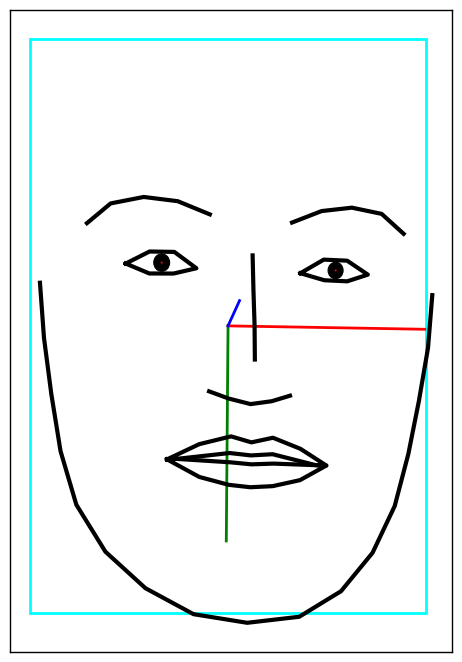

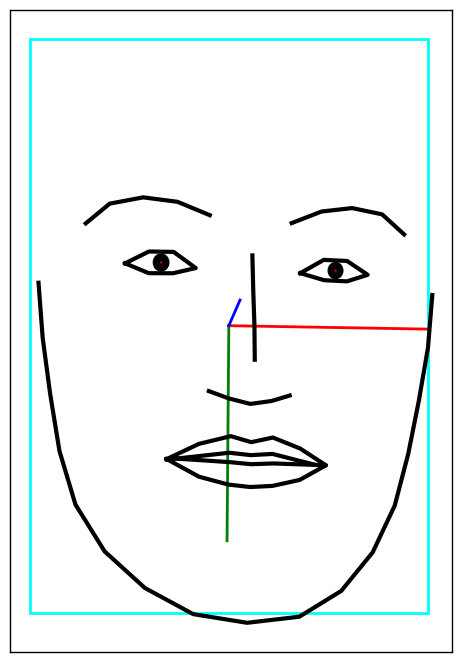

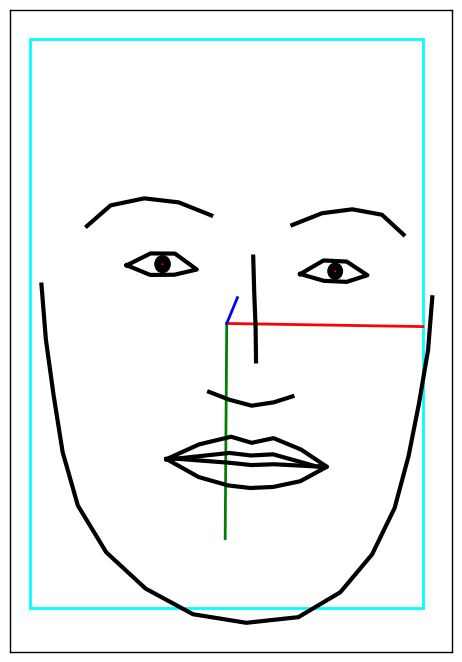

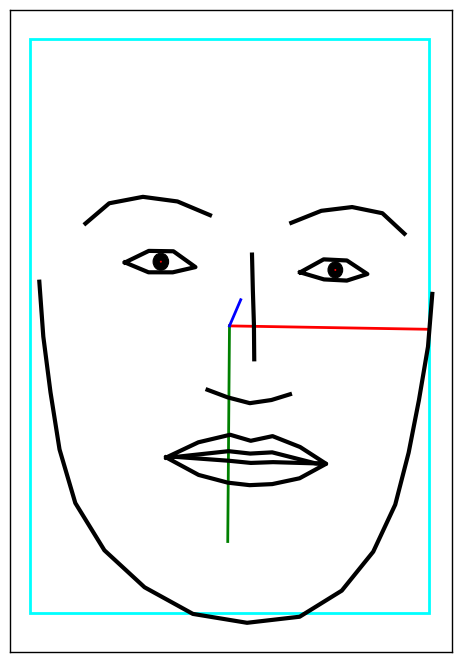

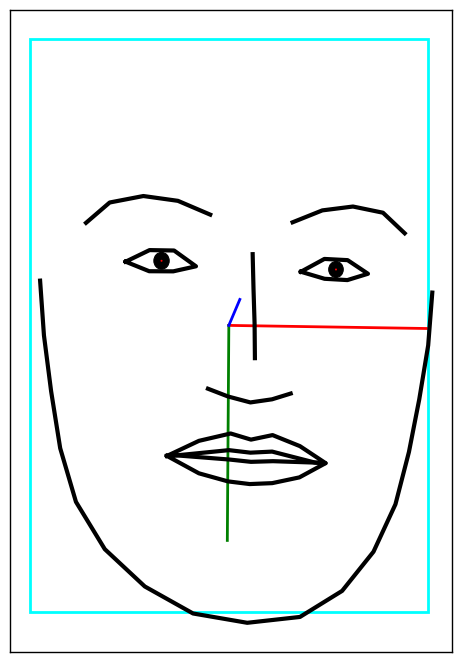

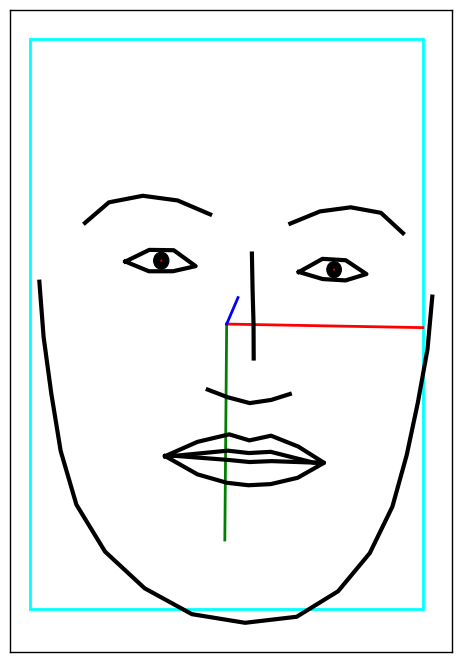

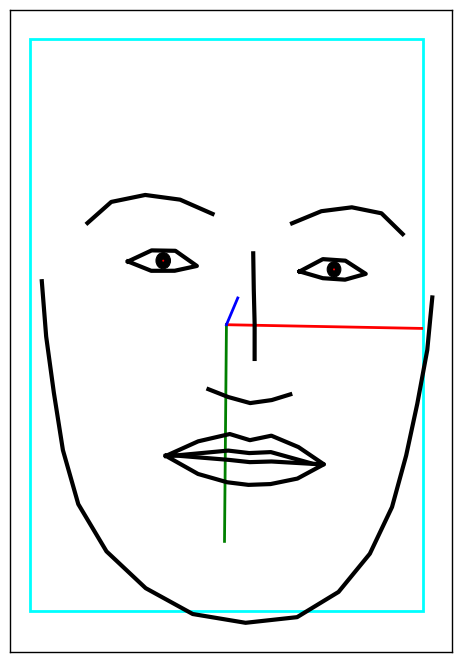

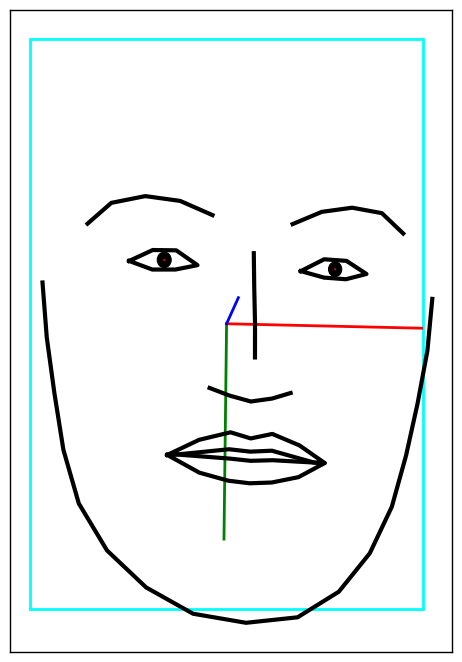

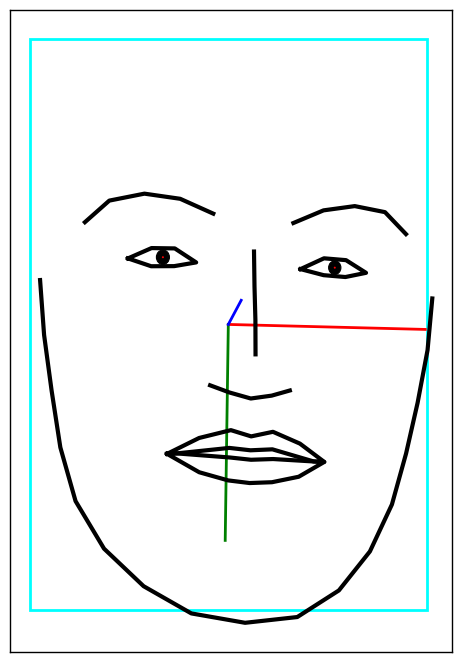

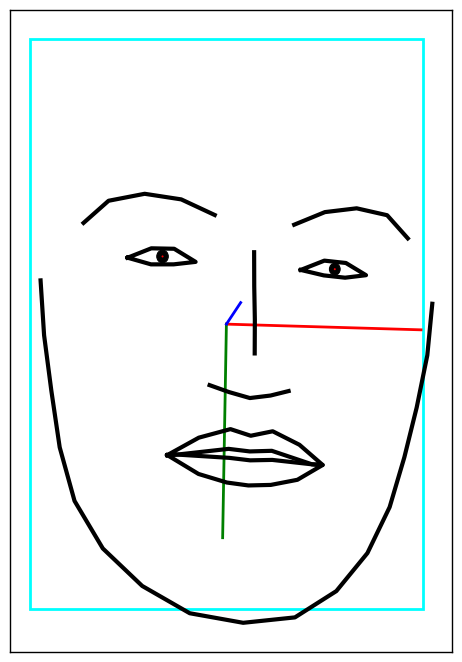

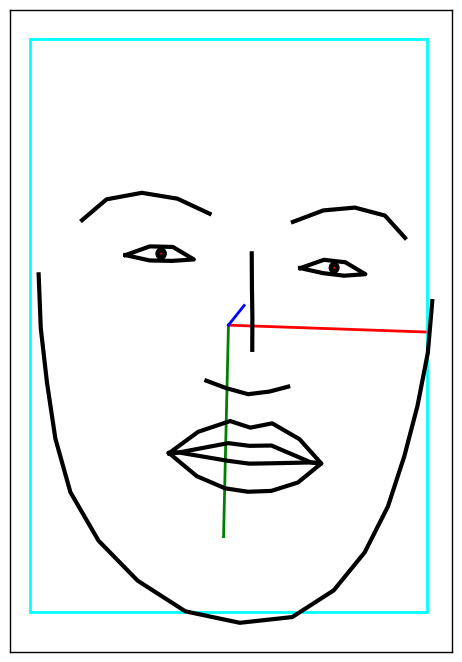

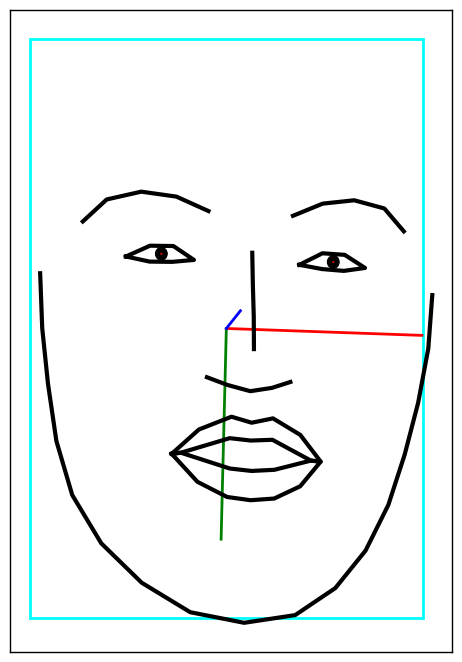

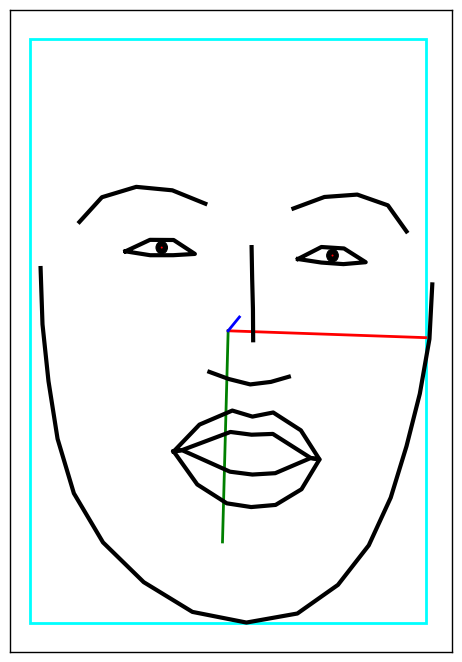

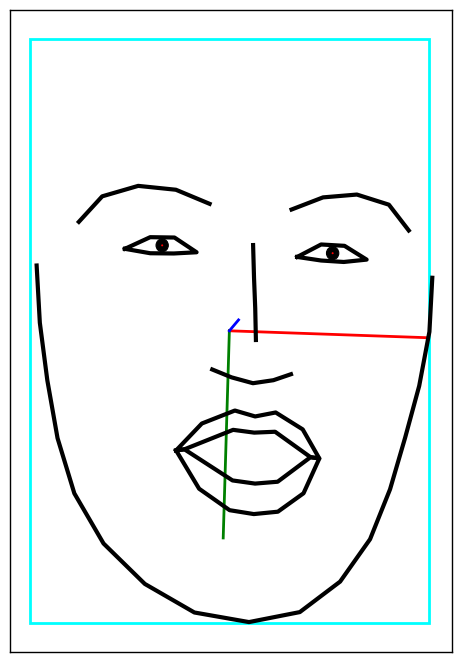

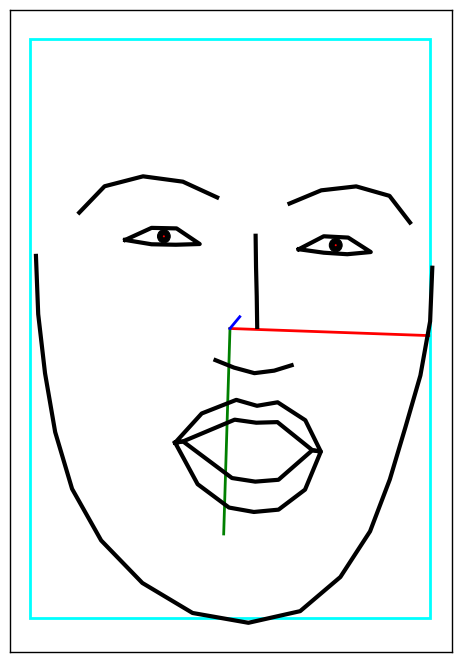

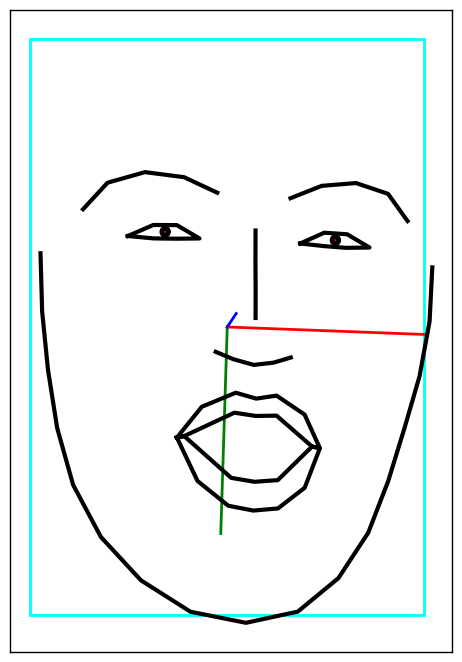

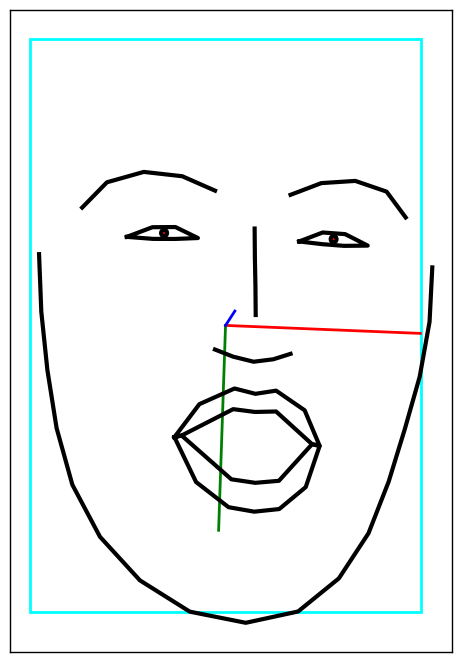

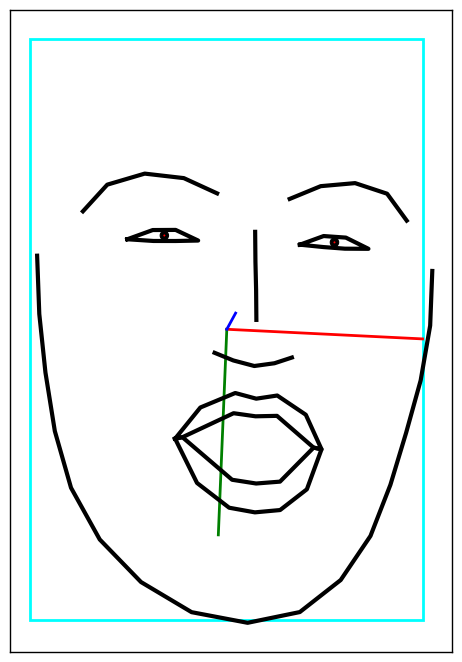

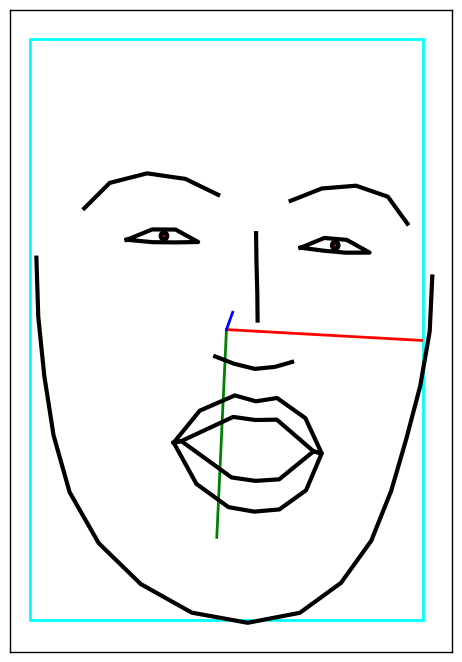

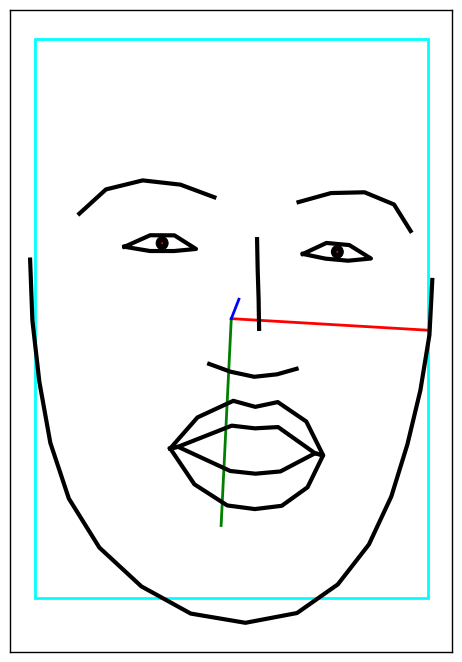

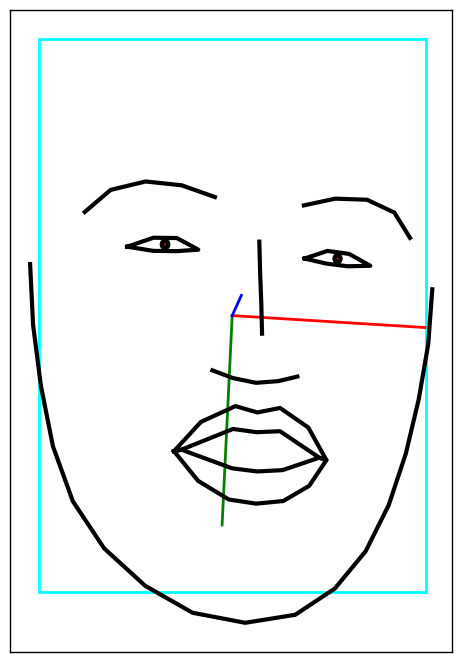

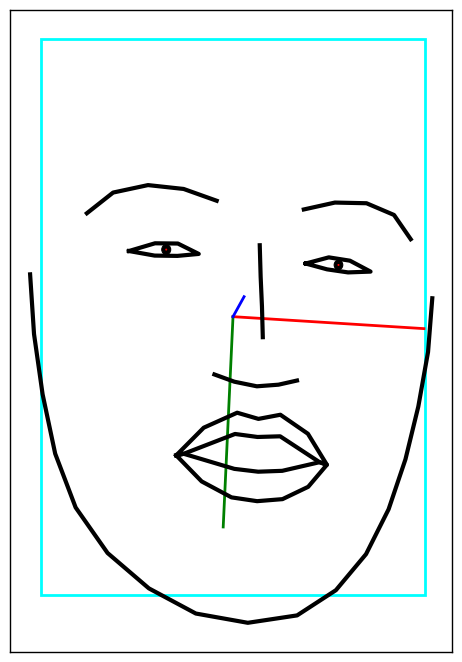

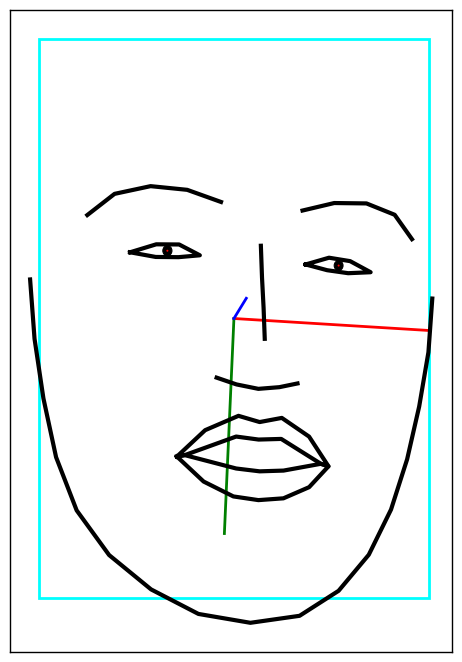

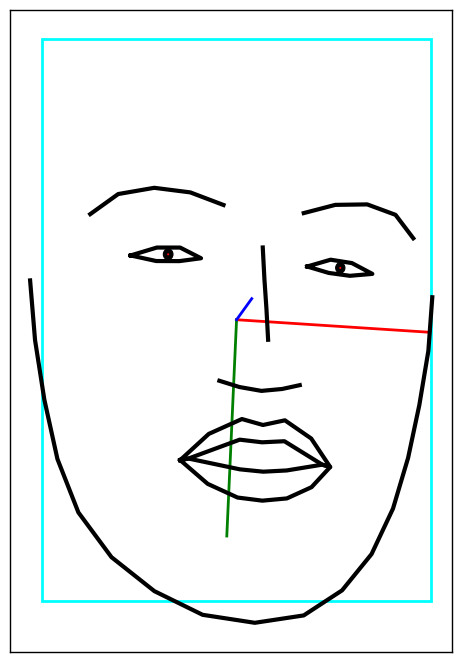

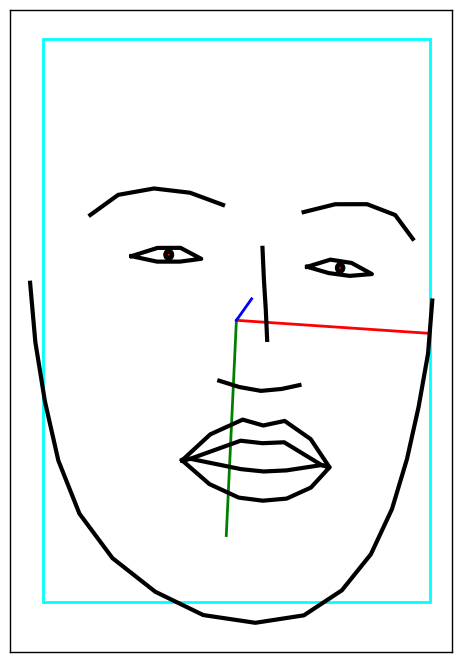

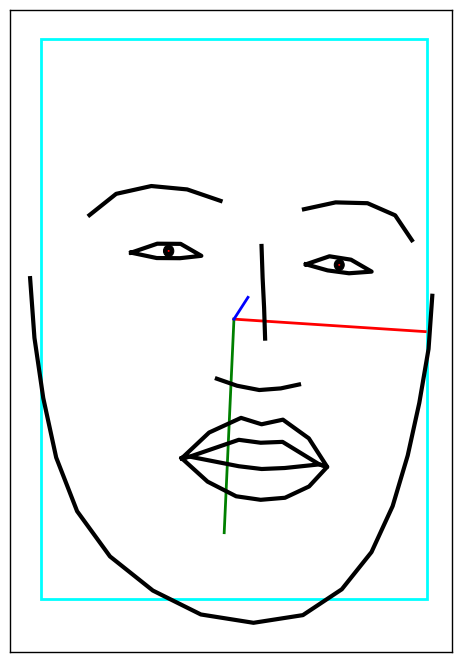

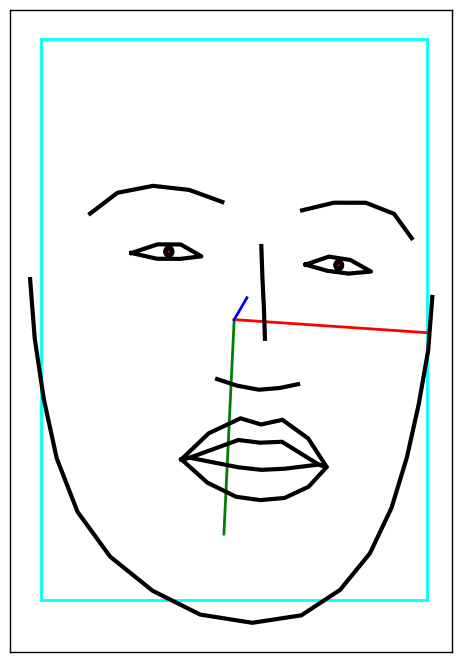

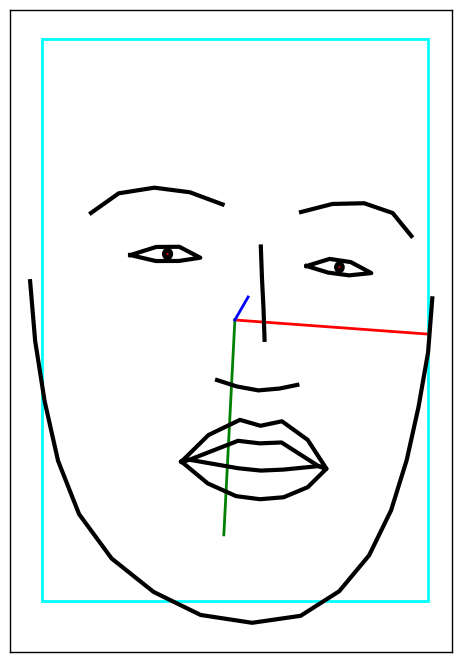

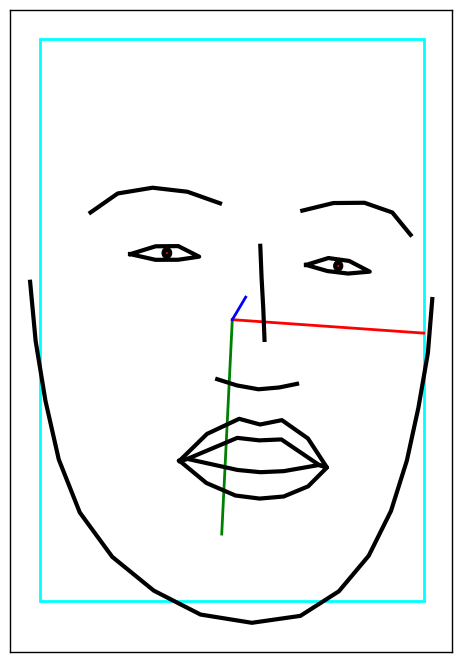

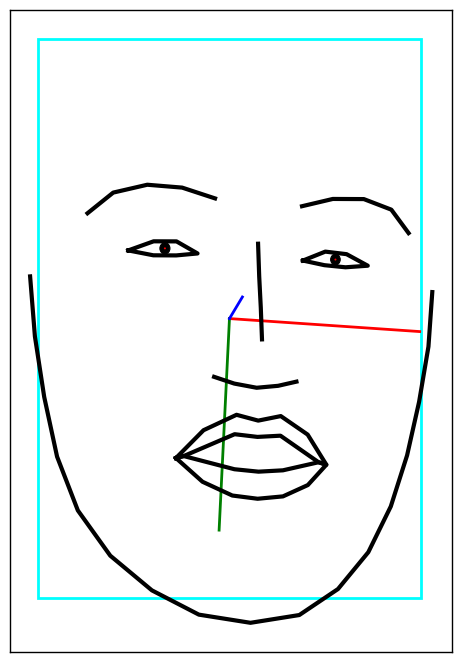

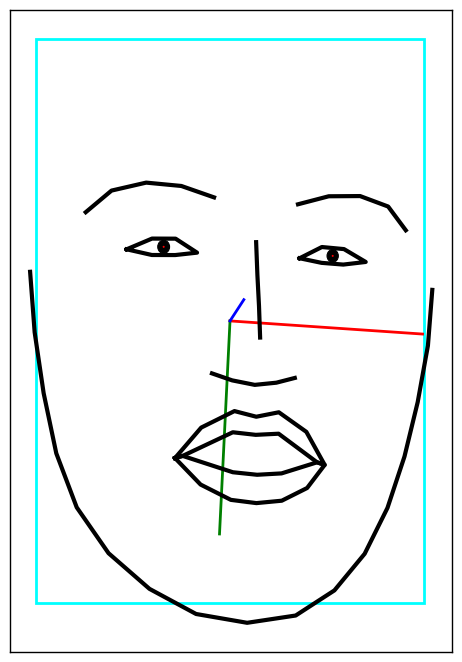

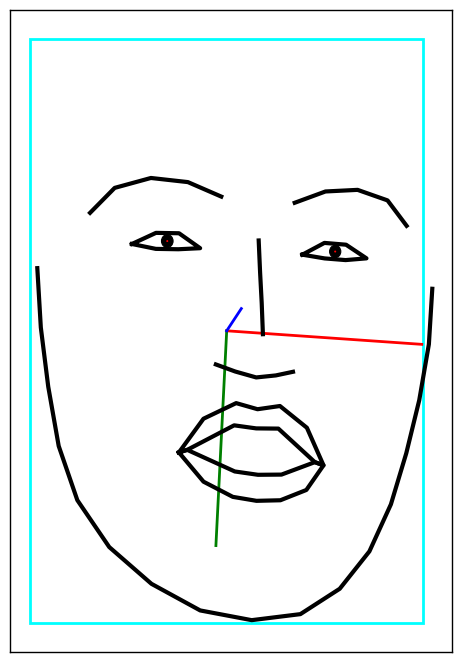

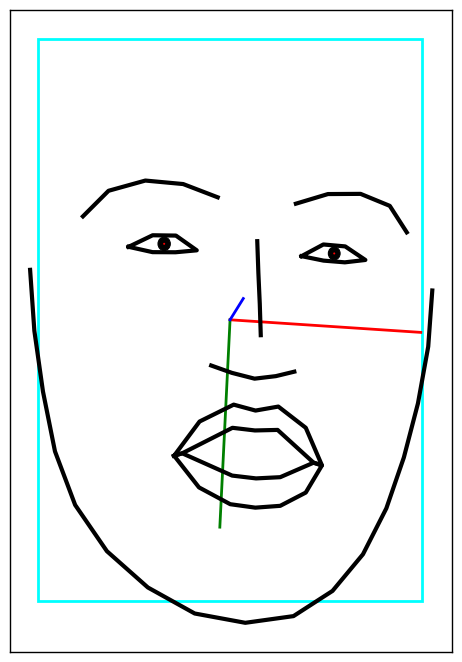

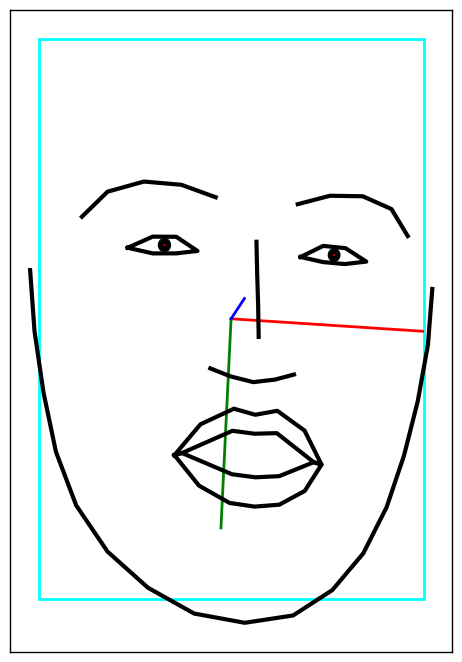

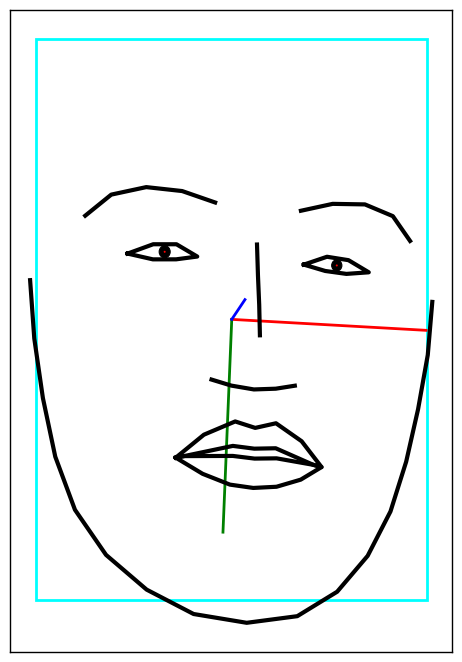

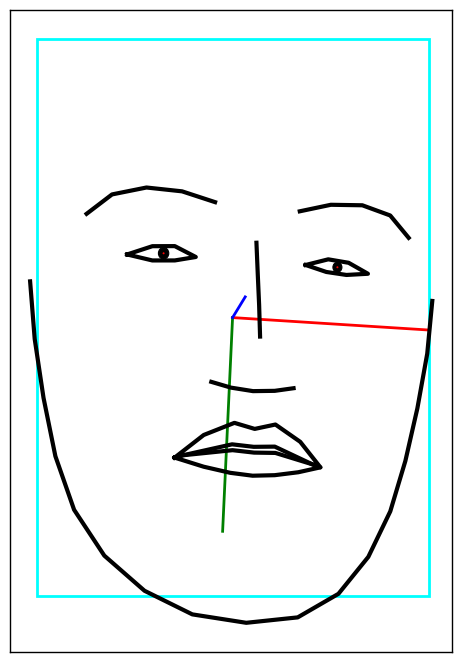

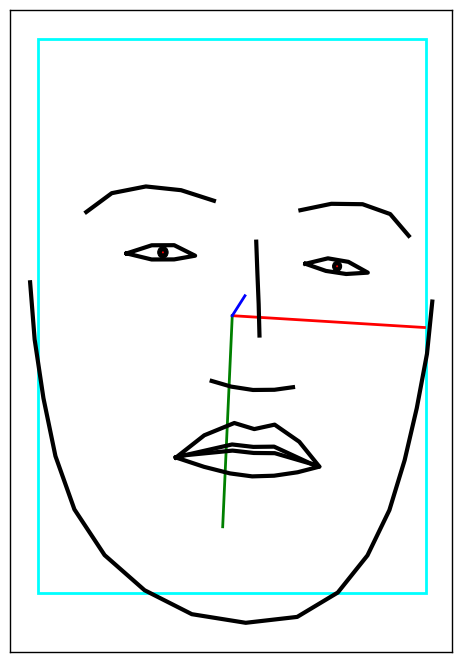

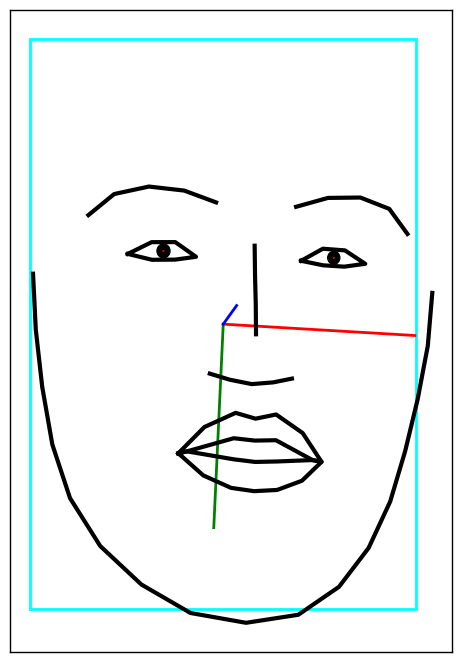

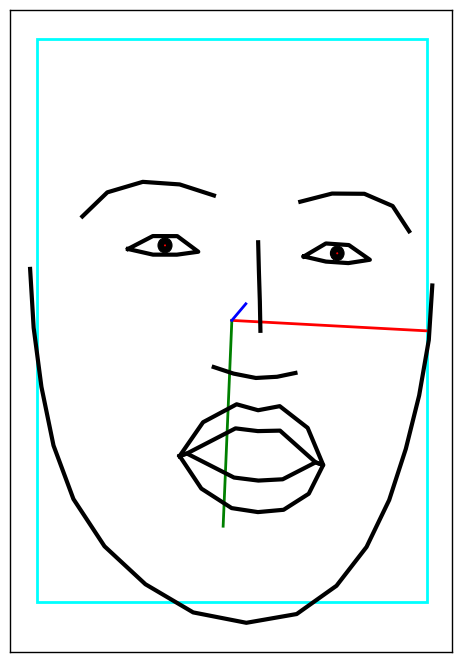

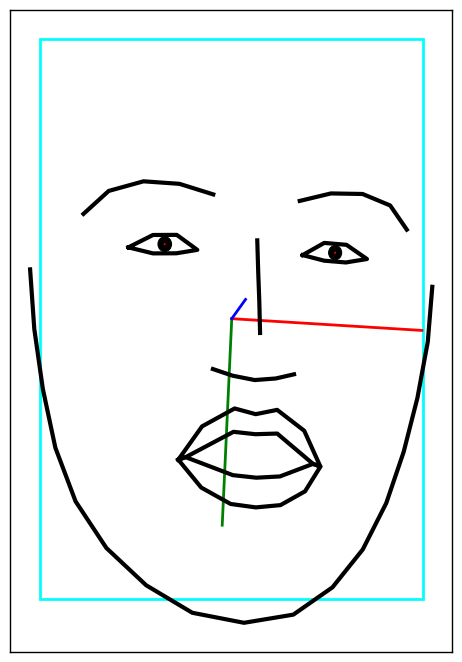

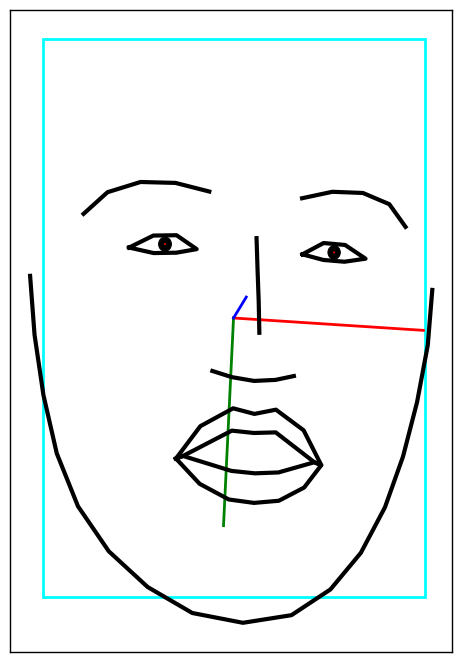

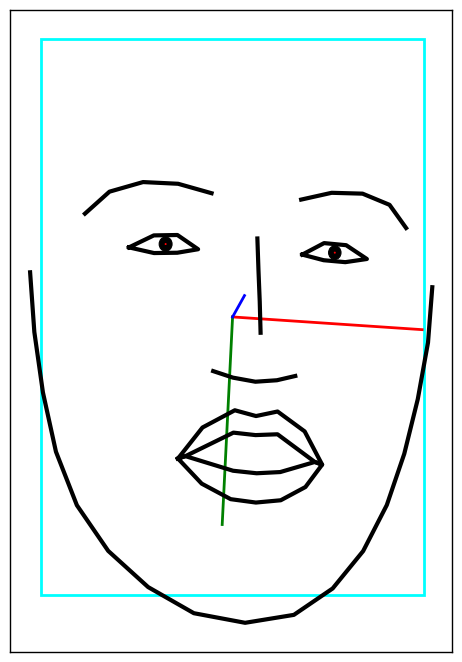

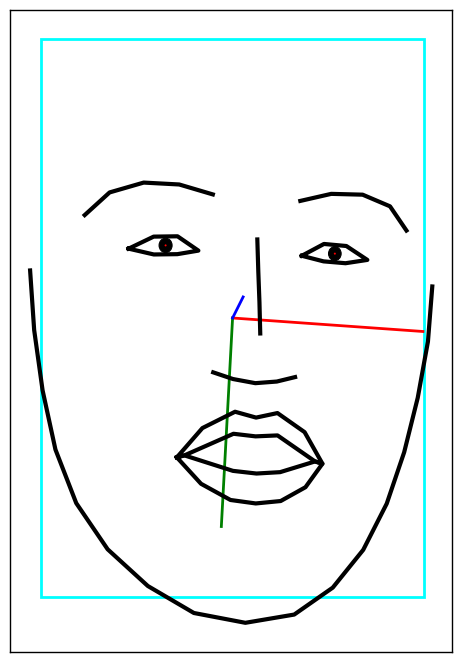

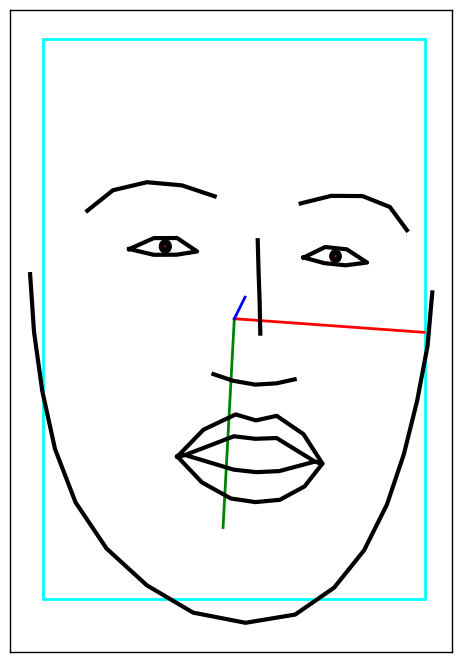

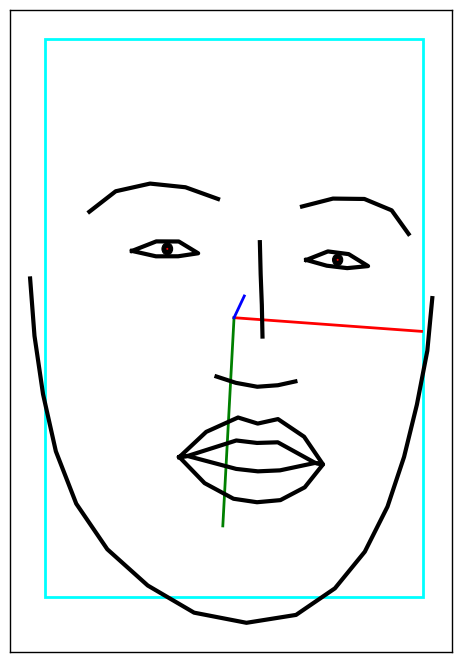

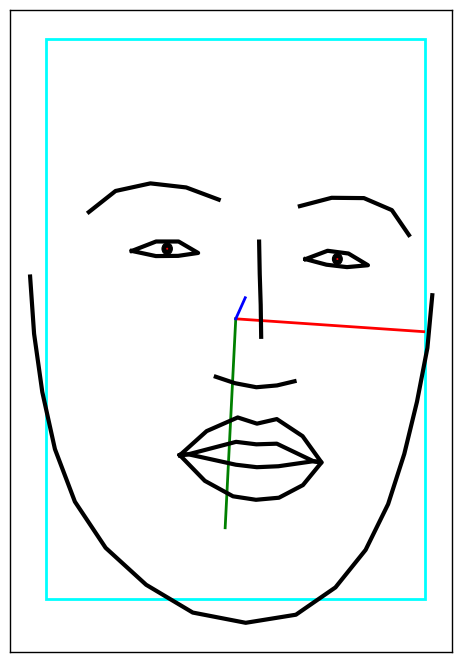

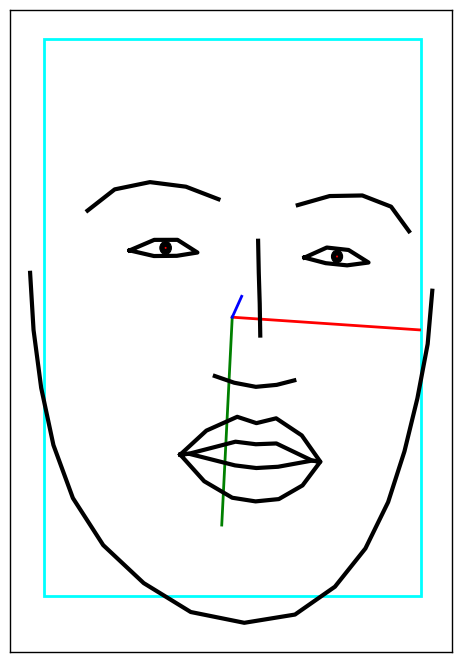

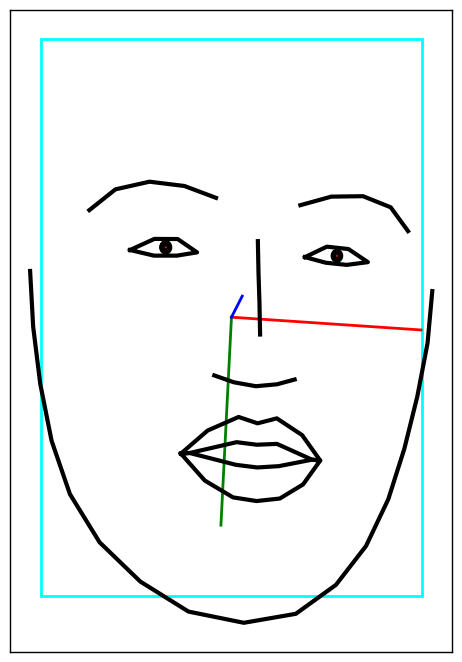

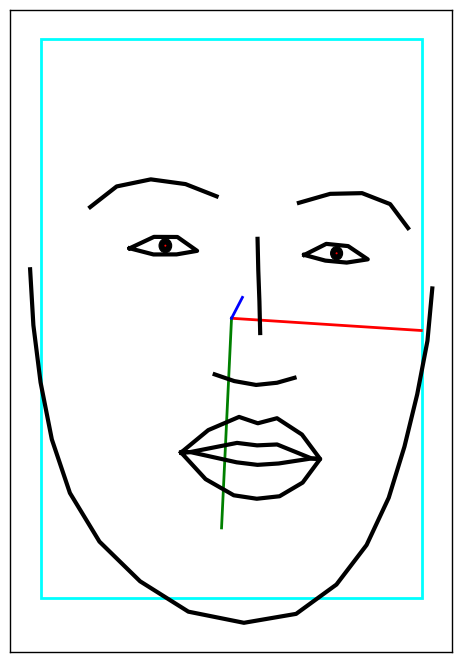

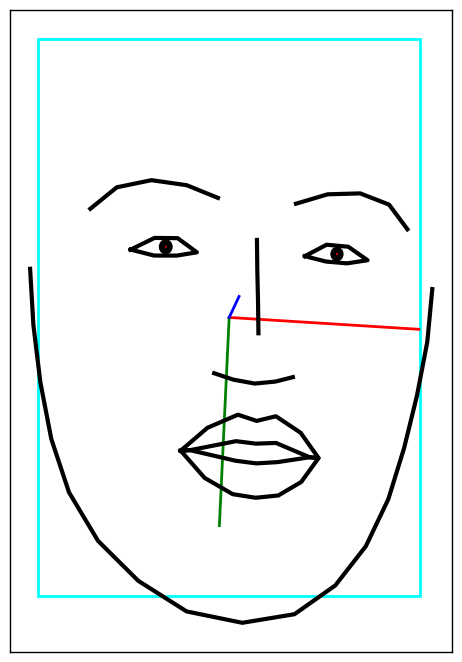

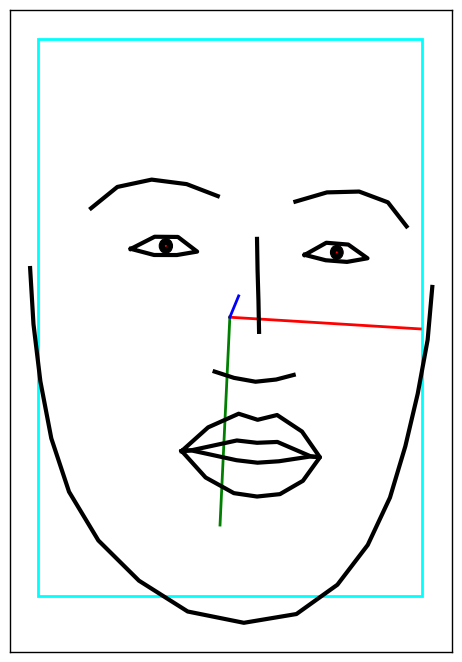

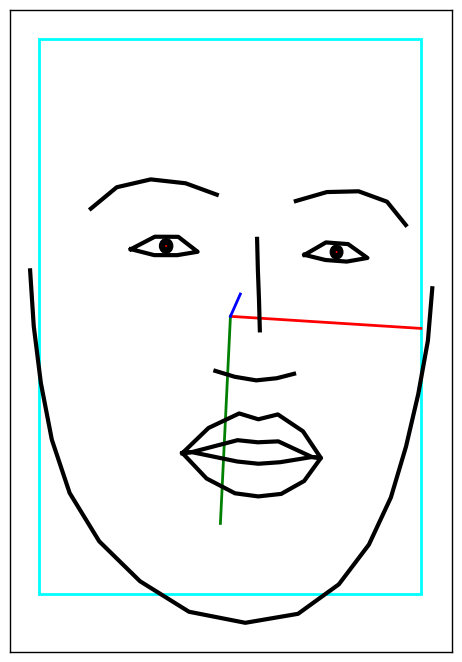

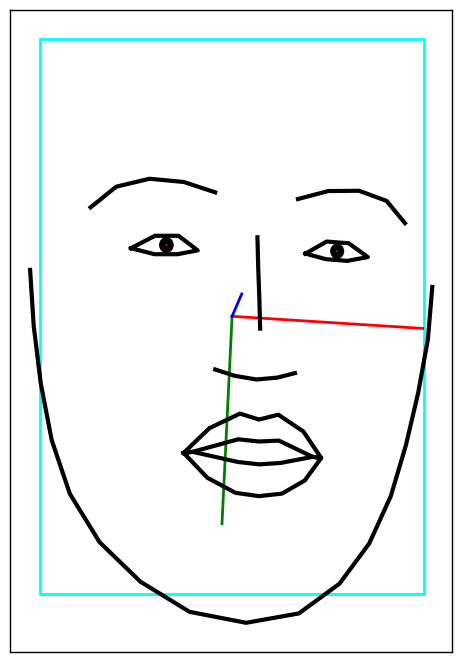

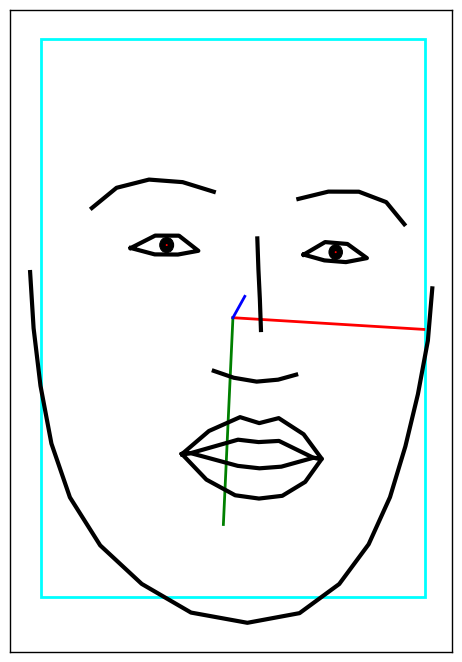

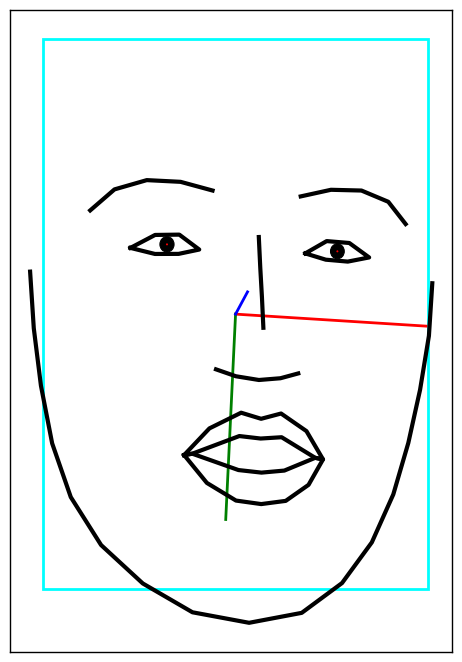

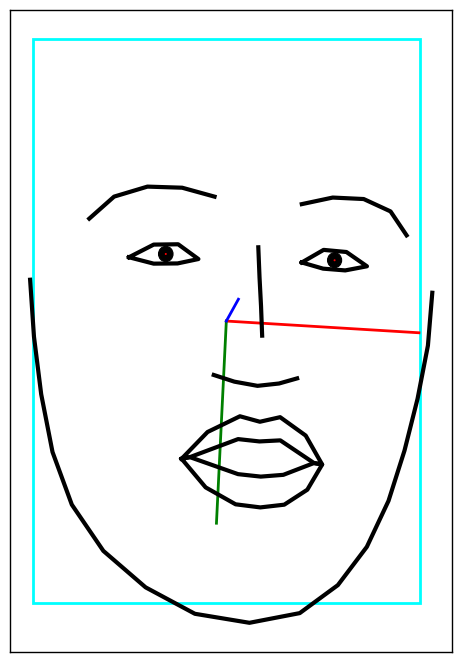

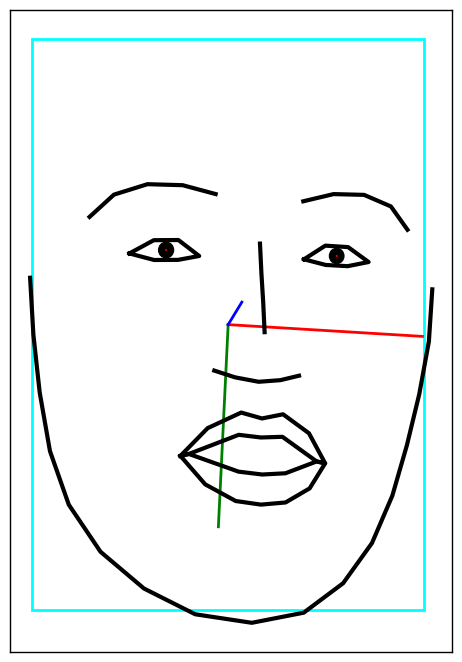

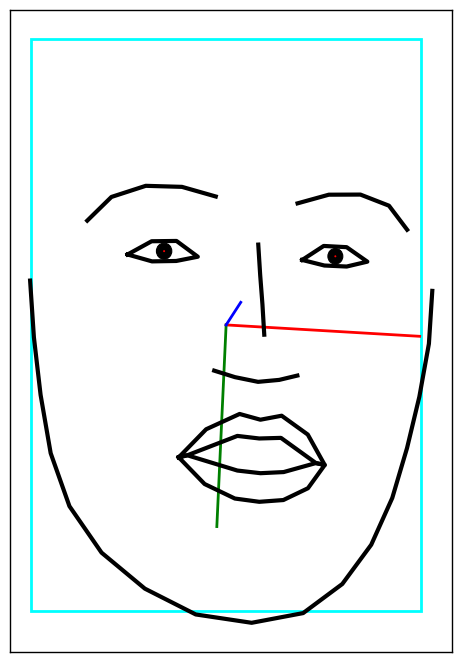

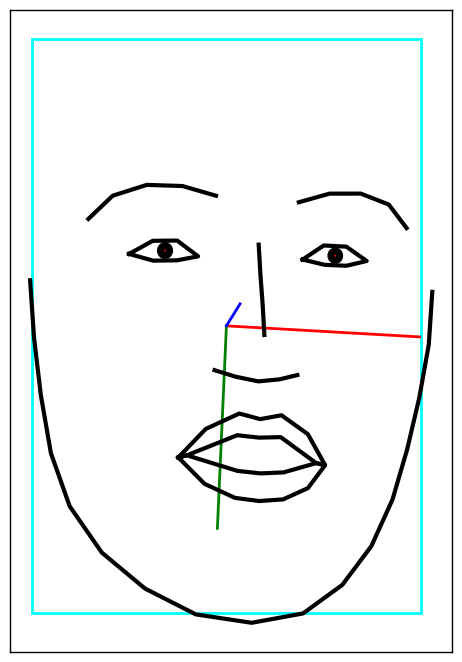

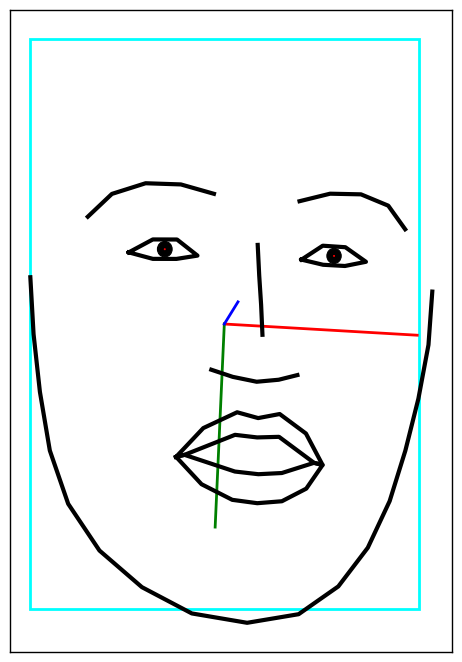

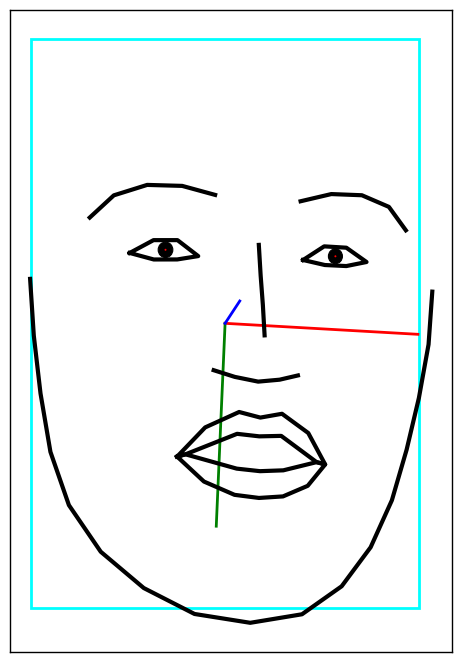

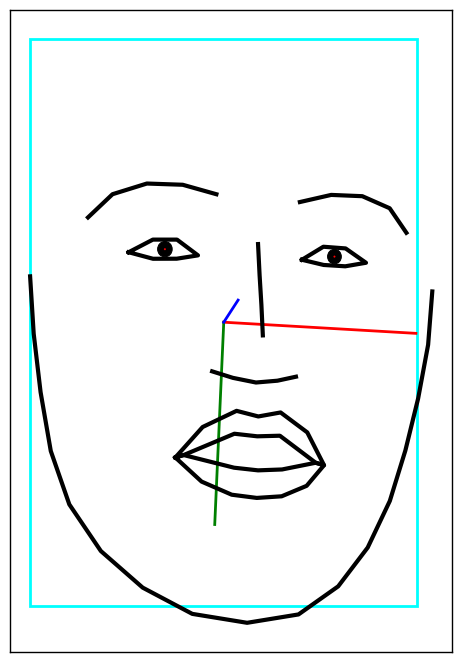

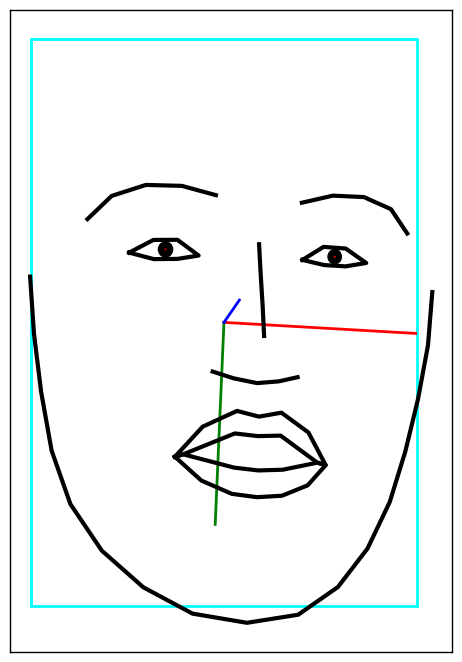

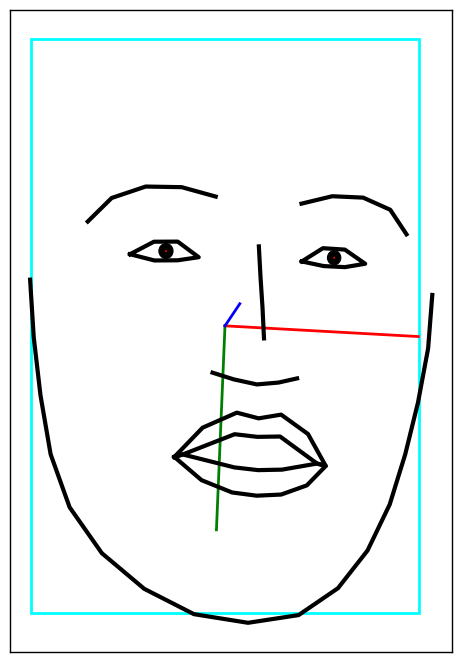

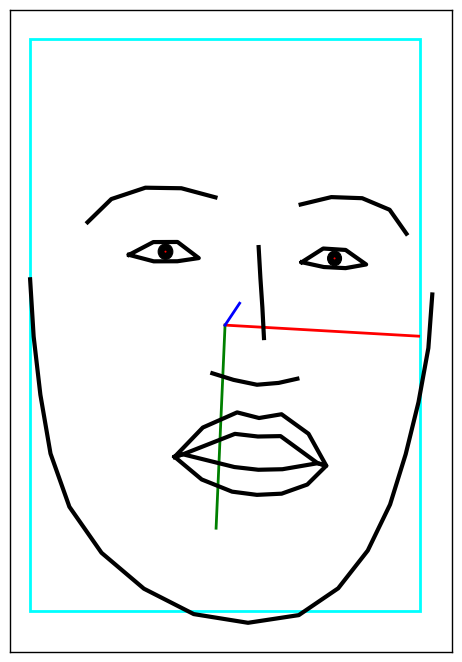

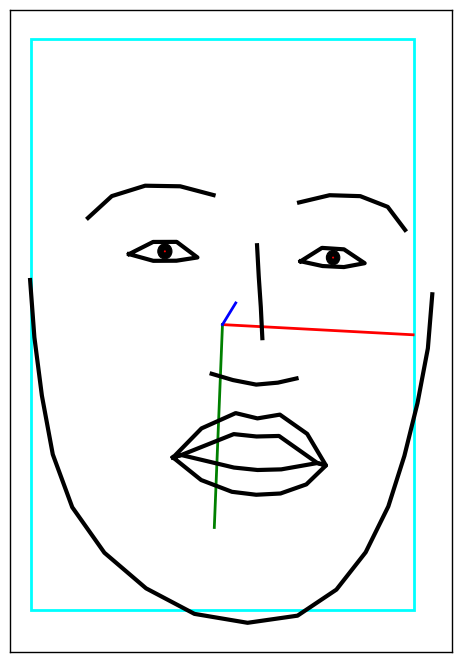

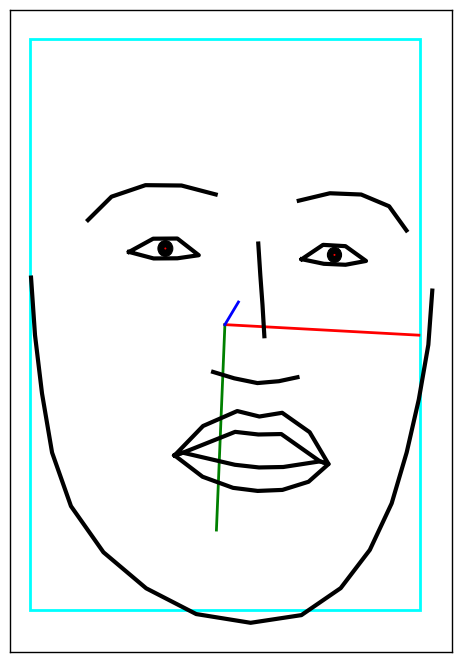

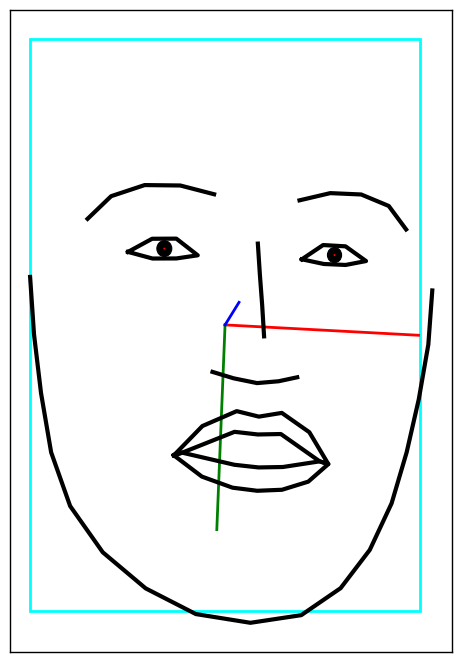

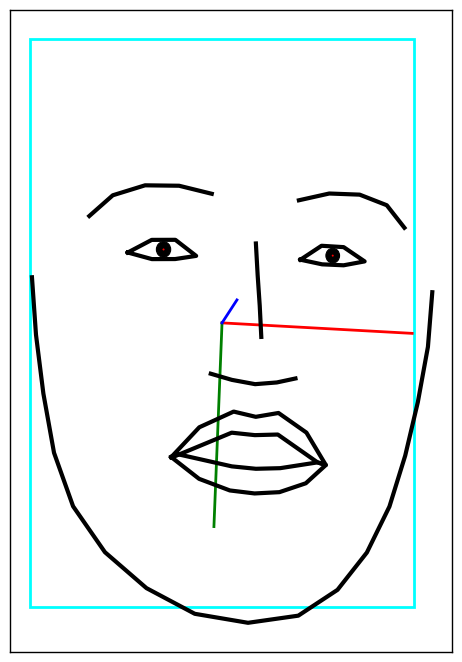

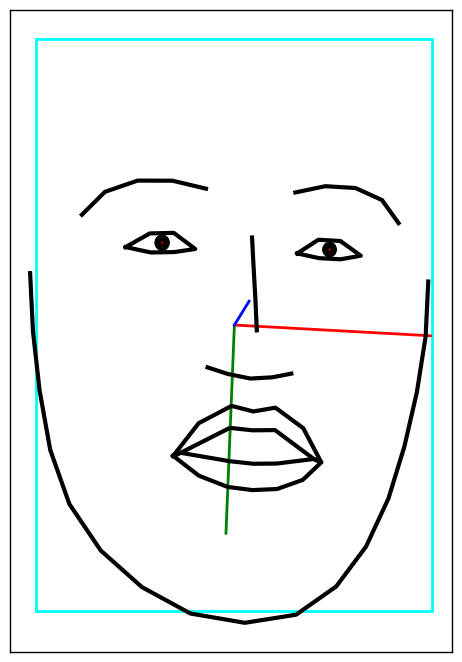

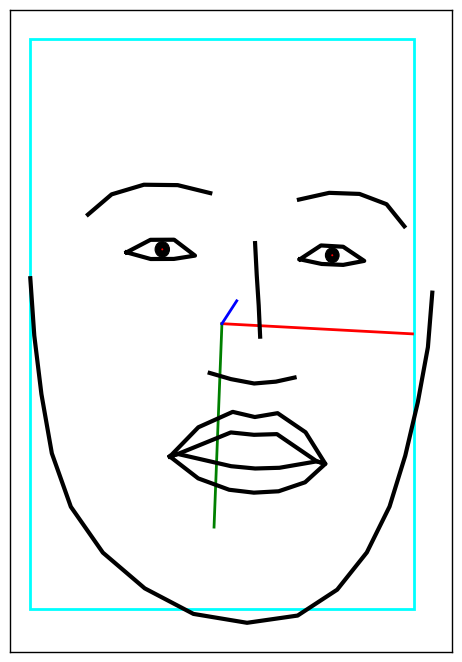

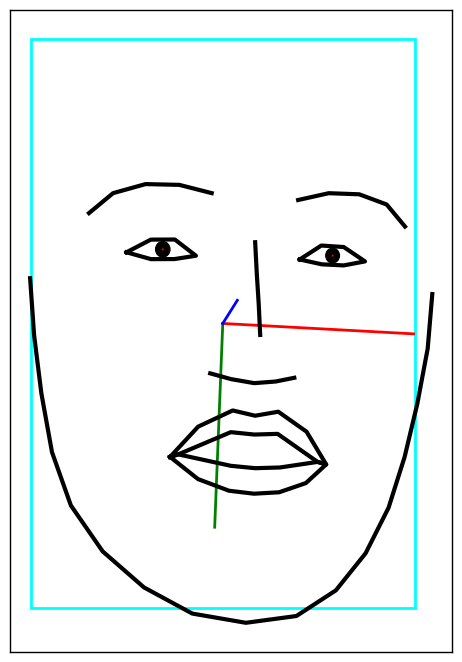

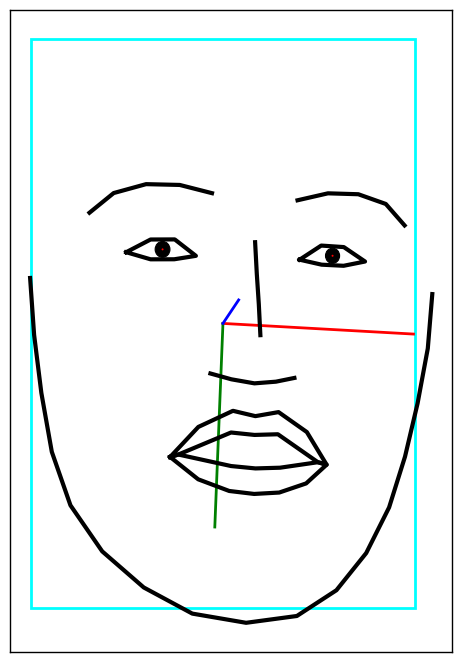

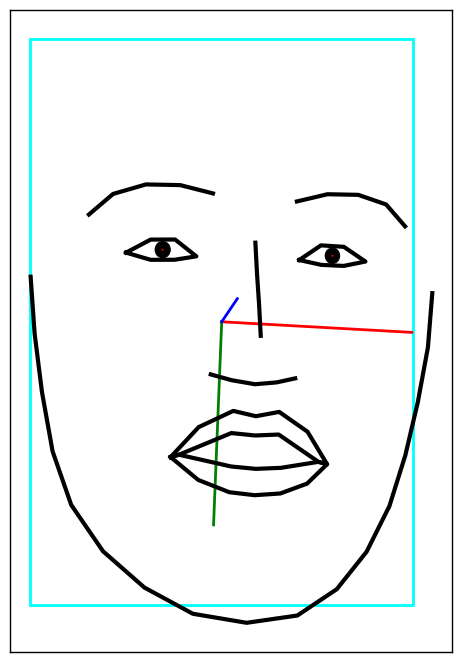

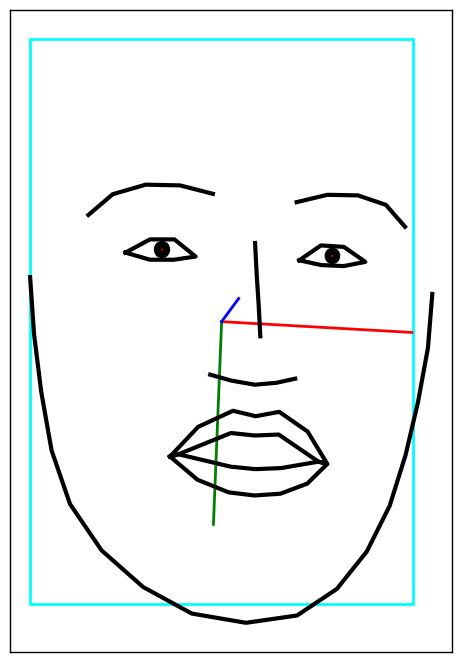

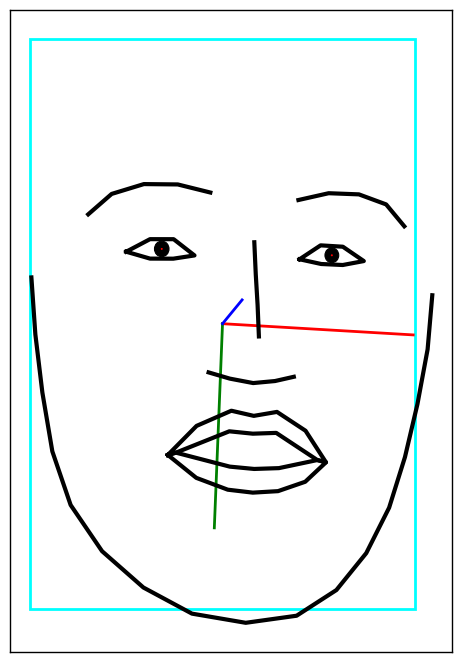

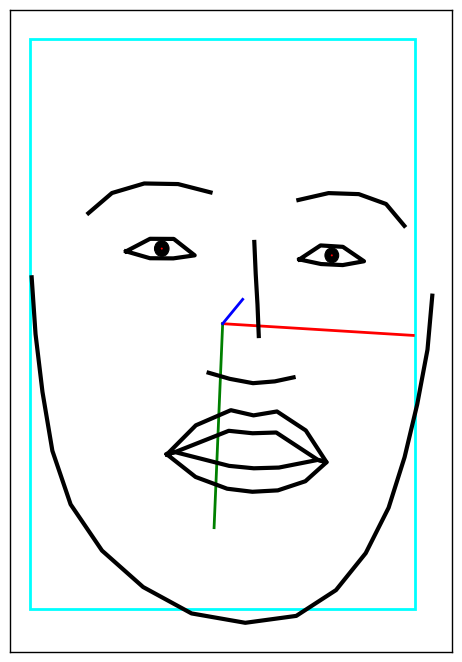

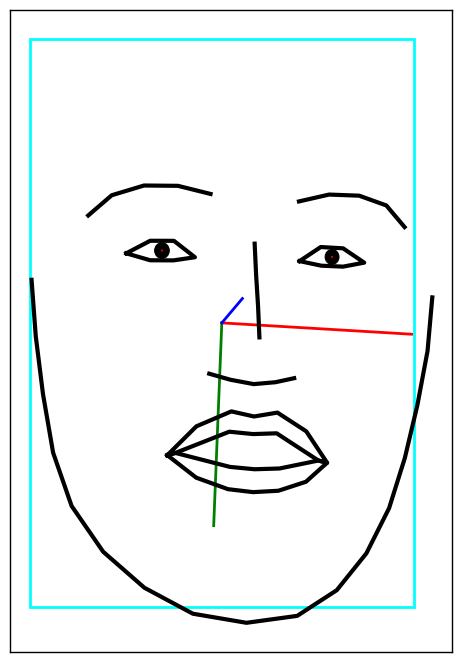

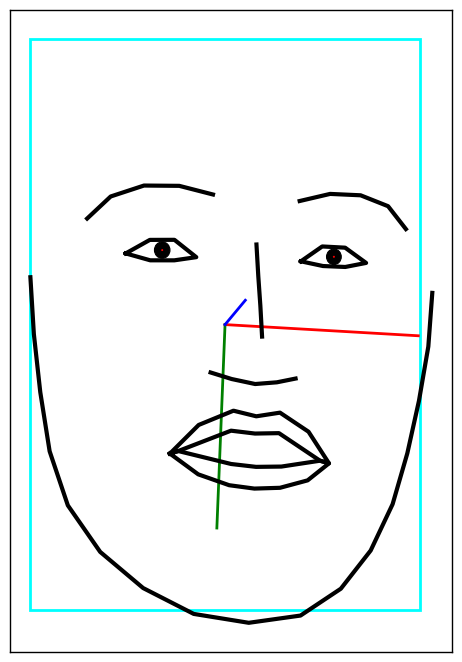

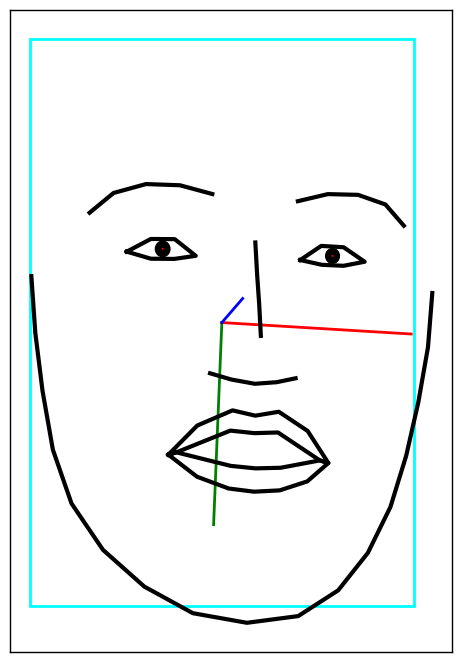

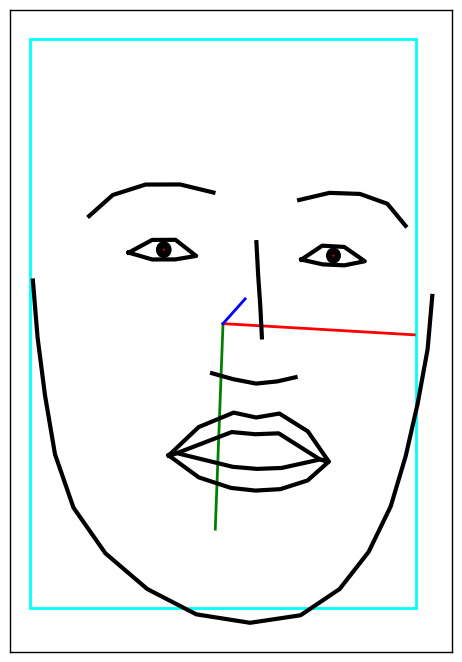

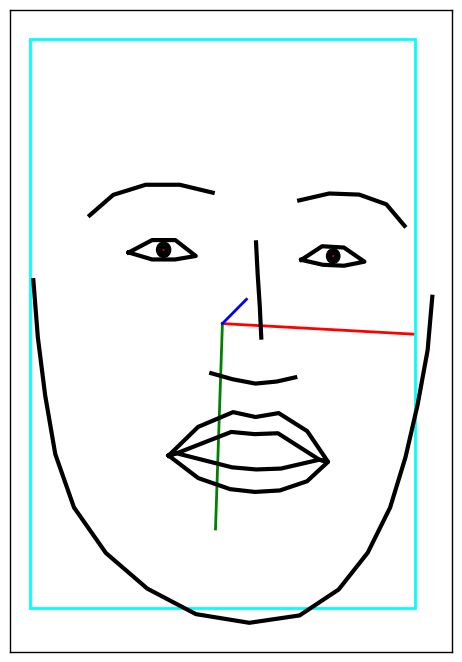

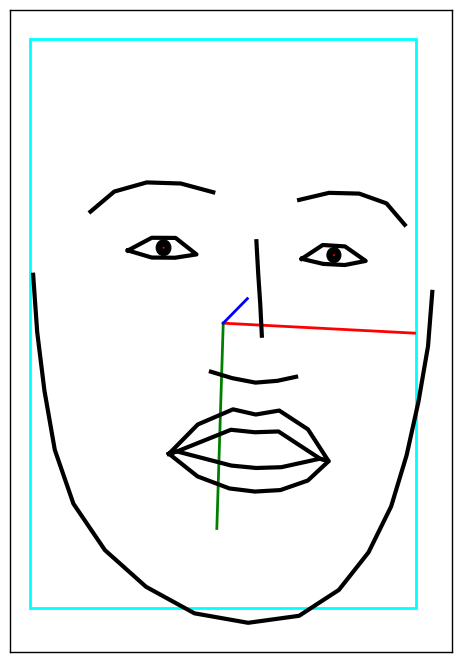

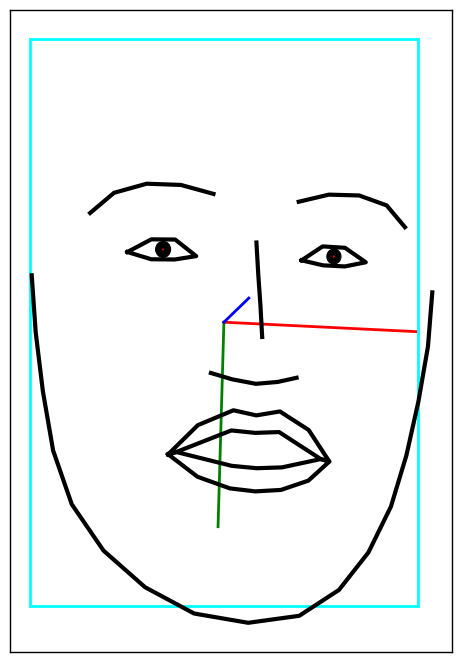

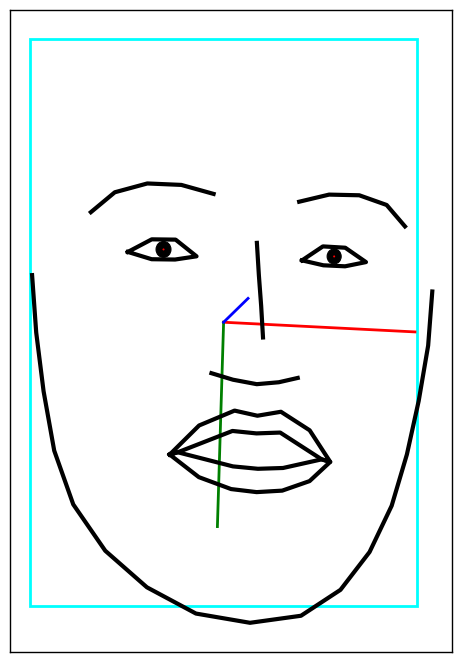

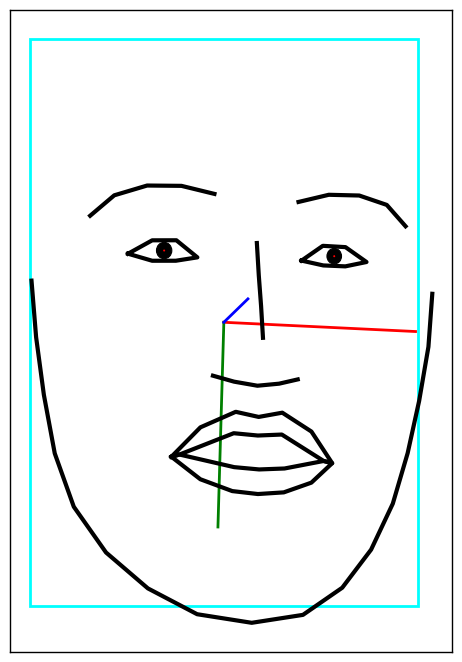

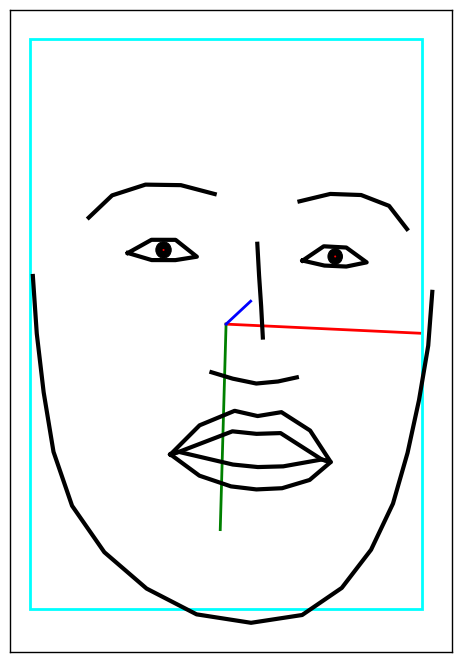

In [39]:
# Constants for video settings
VIDEO_WIDTH, VIDEO_HEIGHT = 1280, 720  # Desired resolutionFalse
DPI = 100  # Resolution in dots per inch

print("generating overlay for each frame")
# generate overlay for each frame
figs = video_prediction.plot_detections(faces='landmarks', 
                                          faceboxes=True, 
                                          muscles=False, 
                                          poses=True, 
                                          gazes=False, 
                                          add_titles=False, 
                                          au_barplot=False, 
                                          emotion_barplot=False, 
                                          plot_original_image=False
                                          );

# Create a video writer object, specifying the output file, codec, and framerate
writer = imageio.get_writer(output_filename, fps=30, codec='libx264', format='FFMPEG', macro_block_size=None)

print("generating video")
# Loop through each figure in the list, adjust size, save it to a buffer, and append it to the video
for fig in figs:
    # Set the figure size to correspond to the desired pixel dimensions
    
    # Use a buffer to save the figure
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=DPI)
    buf.seek(0)
    
    # Read the image from the buffer and add it to the video
    image = imageio.imread(buf)
    writer.append_data(image)
    
    # Close the buffer
    buf.close()

# Close the writer to finalize the video
writer.close()

print(f'Video saved as {output_filename}')
